Importar Librerias

In [1]:
import timeit
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

# Cargar el conjunto de datos de diabetes
diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target

#Extraer la característica 2 de los datos de diabetes
X, y = datasets.load_diabetes(return_X_y=True)
raw = X[:, None, 2]

# Obtener los nombres de las características
feature_names = diabetes.feature_names

# Crear un DataFrame con los datos extraídos
df = pd.DataFrame(raw, columns=[feature_names[2]])

# Mostrar los primeros 10 ítems en una tabla
print(df.head(10))

        bmi
0  0.061696
1 -0.051474
2  0.044451
3 -0.011595
4 -0.036385
5 -0.040696
6 -0.047163
7 -0.001895
8  0.061696
9  0.039062


(array([32., 66., 98., 90., 61., 53., 23., 12.,  5.,  2.]),
 array([-1.89792941, -1.34956464, -0.80119987, -0.2528351 ,  0.29552967,
         0.84389444,  1.39225921,  1.94062398,  2.48898875,  3.03735352,
         3.58571828]),
 <BarContainer object of 10 artists>)

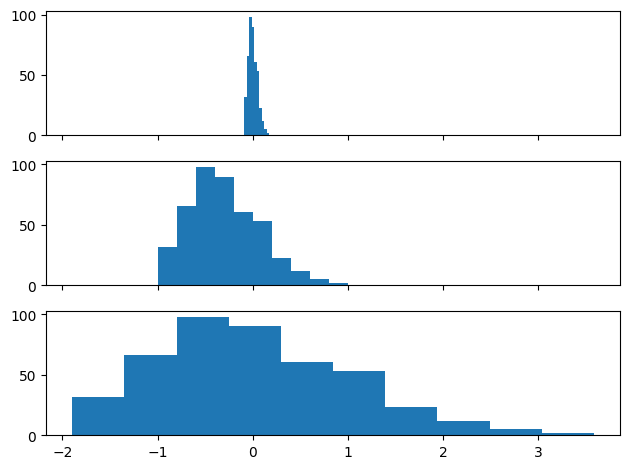

In [2]:
# escalamiento max-min
max_raw = max(raw) 
min_raw = min(raw) 
scaled = (2*raw - max_raw -min_raw)/(max_raw - min_raw)

# normalización Z-score

avg = np.average(raw) 
std = np.std(raw) 
z_scaled = (raw - avg)/std 

fig, axs = plt.subplots(3, 1, sharex=True, tight_layout=True) 

axs[0].hist(raw) 
axs[1].hist(scaled)
axs[2].hist(z_scaled)

In [3]:
# modelos para entrenamiento
def train_raw():
    linear_model.LinearRegression().fit(raw, y)

def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)

def train_z_scaled():
    linear_model.LinearRegression().fit(z_scaled, y)

In [4]:
raw_time = timeit.timeit(train_raw, number = 100)
scaled_time = timeit.timeit(train_raw, number = 100)
z_scaled_time = timeit.timeit(train_raw, number = 100)
print('trainning time for raw data : {} '.format(raw_time))
print('trainning time for scaled data : {}'.format(scaled_time))
print('trainning time for z_scaled data : {}'.format(z_scaled_time))

trainning time for raw data : 0.057933500000217464 
trainning time for scaled data : 0.050650500001211185
trainning time for z_scaled data : 0.04933600000003935


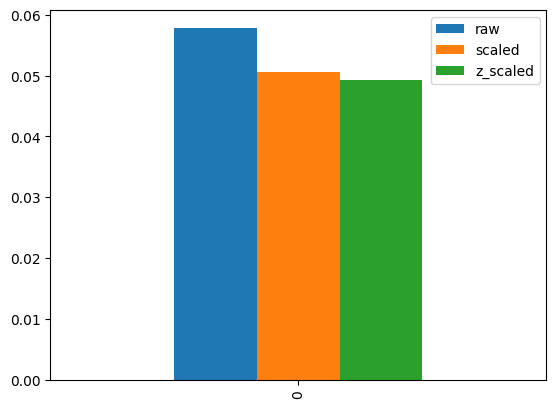

In [5]:
# Generar un dataframe con los tiempos de entrenamiento
df = pd.DataFrame({'raw': raw_time, 'scaled': scaled_time, 'z_scaled': z_scaled_time}, index=[0])
df.plot(kind='bar')
plt.show()

In [6]:
# Generar una regresión lineal con los datos escalados  y normalizados
reg = linear_model.LinearRegression()
reg.fit(scaled, y)
y_pred = reg.predict(scaled)


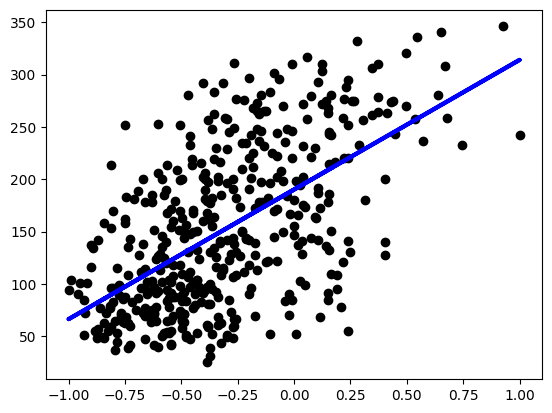

In [7]:
#Predecir los valores de y con los datos escalados y normalizados
plt.scatter(scaled, y, color='black')
plt.plot(scaled, y_pred, color='blue', linewidth=3)
plt.show()

In [8]:
# Determinar un valor específico de x y predecir el valor de y
x = 0.02
y_pred = reg.predict([[x]])
print('Para x = {} el valor de y es {}'.format(x, y_pred))


Para x = 0.02 el valor de y es [192.72019927]


In [9]:
# Generar valores de x desde 0.01 hasta 0.09 incrementando en 0.01
x_values = np.arange(0.01, 0.10, 0.01).reshape(-1, 1)

# Predecir los valores de y para los valores de x generados
y_predictions = reg.predict(x_values)

# Crear un dataframe con los valores de x y sus correspondientes predicciones de y
df_predictions = pd.DataFrame({'x': x_values.flatten(), 'y_pred': y_predictions.flatten()})

print(df_predictions)

      x      y_pred
0  0.01  191.481991
1  0.02  192.720199
2  0.03  193.958408
3  0.04  195.196616
4  0.05  196.434825
5  0.06  197.673033
6  0.07  198.911242
7  0.08  200.149450
8  0.09  201.387659
